<a href="https://colab.research.google.com/github/YasmimCarvalhos/Train_Melanoma/blob/main/DetectorTypesMelanoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv8 Detection on a Custom Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Hardware accelerator

In [ ]:
!nvidia-smi

Wed Feb 25 14:44:39 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   42C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%cd /content/drive/MyDrive/Treinamento TCC YAS/Cenário 2

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2


## Install YOLO

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (NVIDIA L4, 22563MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Dataset Roboflow

In [ ]:
!pip install roboflow

from IPython import display
display.clear_output()

In [ ]:
#INSERIR O DATASET AQUI
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="C8STPKZBlWXdI44Y0gwu")
project = rf.workspace("melanoma-9nudw").project("tipos-de-melanoma-u7udm")
version = project.version(5)
dataset = version.download("yolo11")

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolo11 format


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data='/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2/Tipos-de-Melanoma-5/data.yaml' epochs=300 imgsz=640 batch=16 lr0=0.001 optimizer=AdamW patience=25

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (NVIDIA L4, 22563MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2/Tipos-de-Melanoma-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=tra

## Results

In [ ]:
!ls '/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2/runs/detect/train2/'

args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch10260.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch10261.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch10262.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2


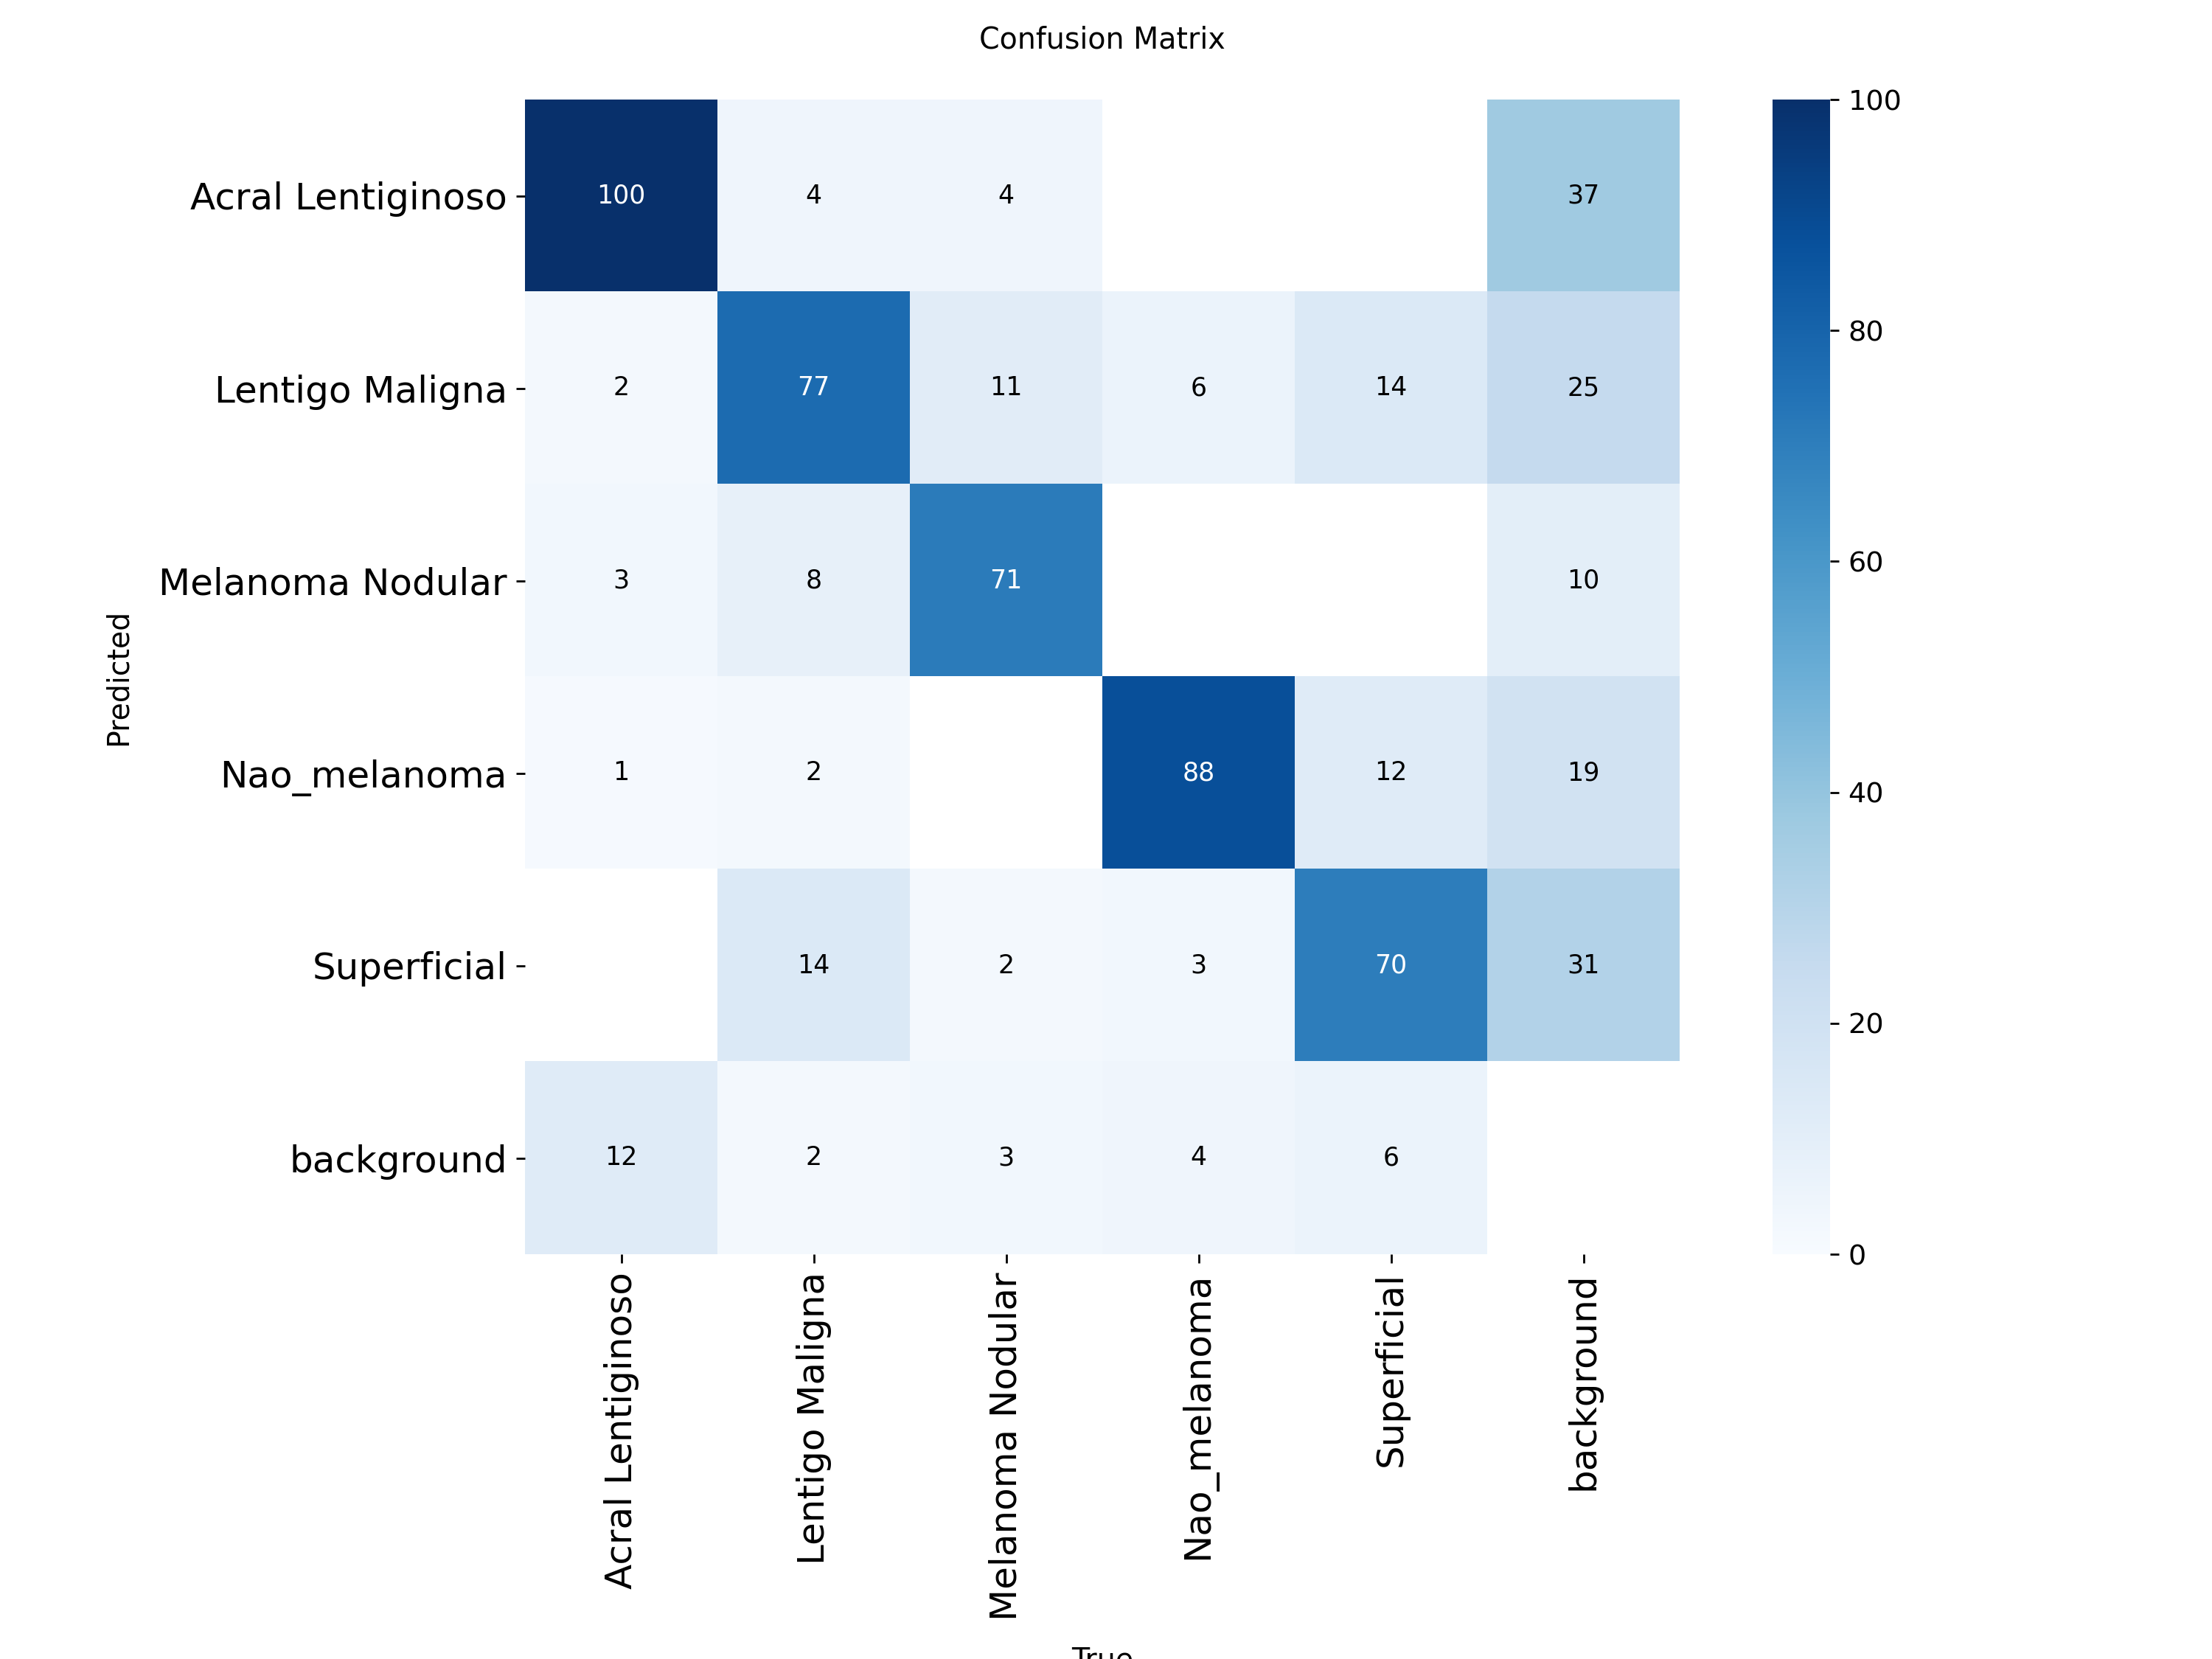

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = f'{HOME}/runs/detect/train2/results.csv'
df = pd.read_csv(results_path)

df.columns  # use isso se quiser conferir os nomes das métricas

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

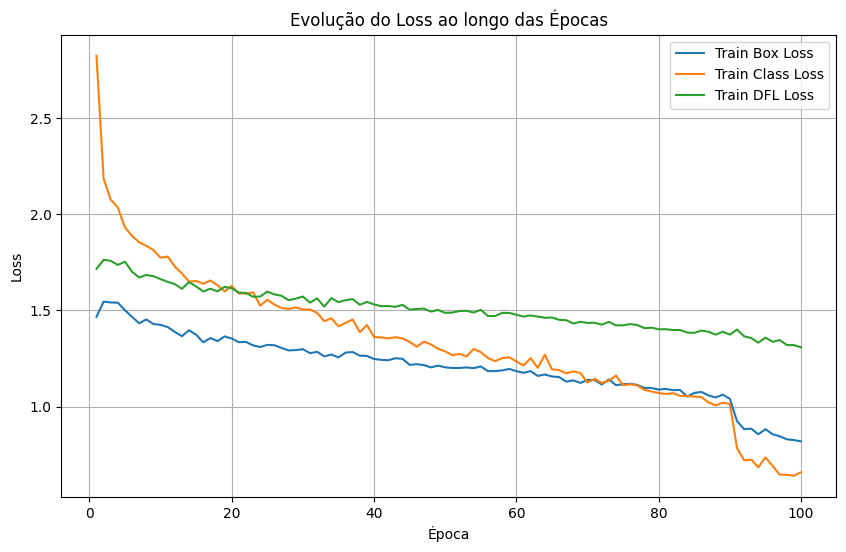

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')

plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')

plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')

plt.title('Evolução do Loss ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

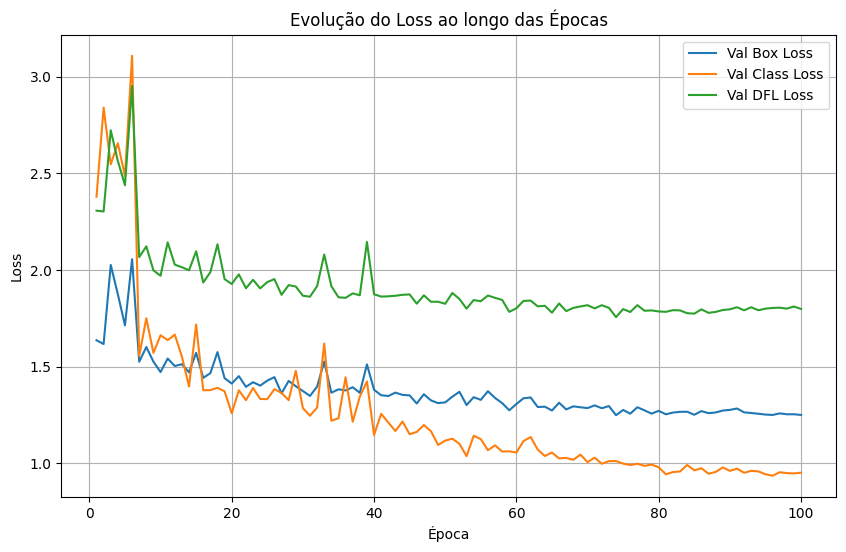

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')

plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')

plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')

plt.title('Evolução do Loss ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

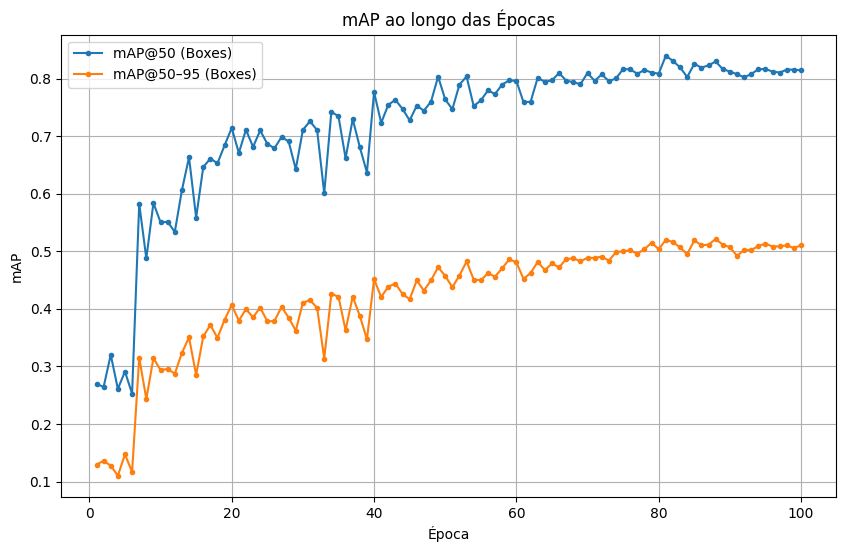

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], marker='.', label='mAP@50 (Boxes)')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], marker='.', label='mAP@50–95 (Boxes)')

plt.title('mAP ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('mAP')
plt.grid(True)
plt.legend()
plt.show()

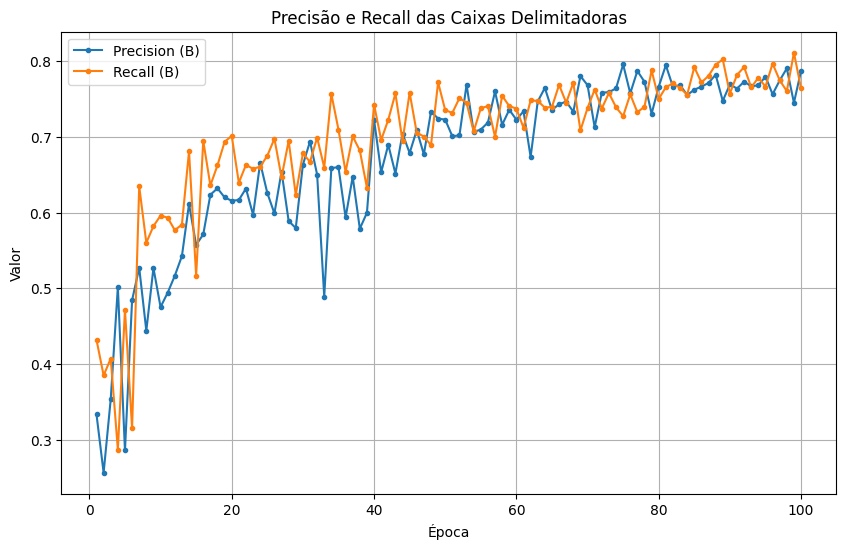

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], marker='.', label='Precision (B)')
plt.plot(df['epoch'], df['metrics/recall(B)'], marker='.', label='Recall (B)')

plt.title('Precisão e Recall das Caixas Delimitadoras')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()

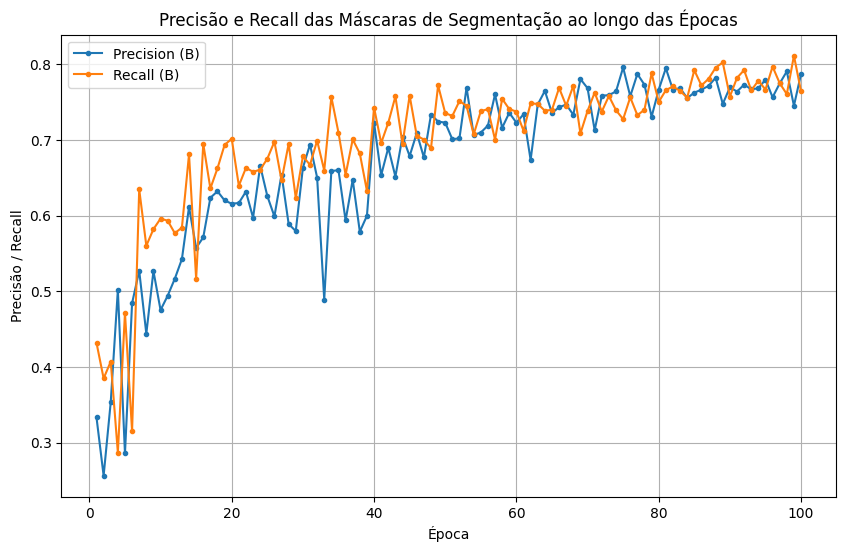

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['metrics/precision(B)'],
         marker='.', linestyle='-', label='Precision (B)')

plt.plot(df['epoch'], df['metrics/recall(B)'],
         marker='.', linestyle='-', label='Recall (B)')

plt.title('Precisão e Recall das Máscaras de Segmentação ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Precisão / Recall')
plt.grid(True)
plt.legend()
plt.show()

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2


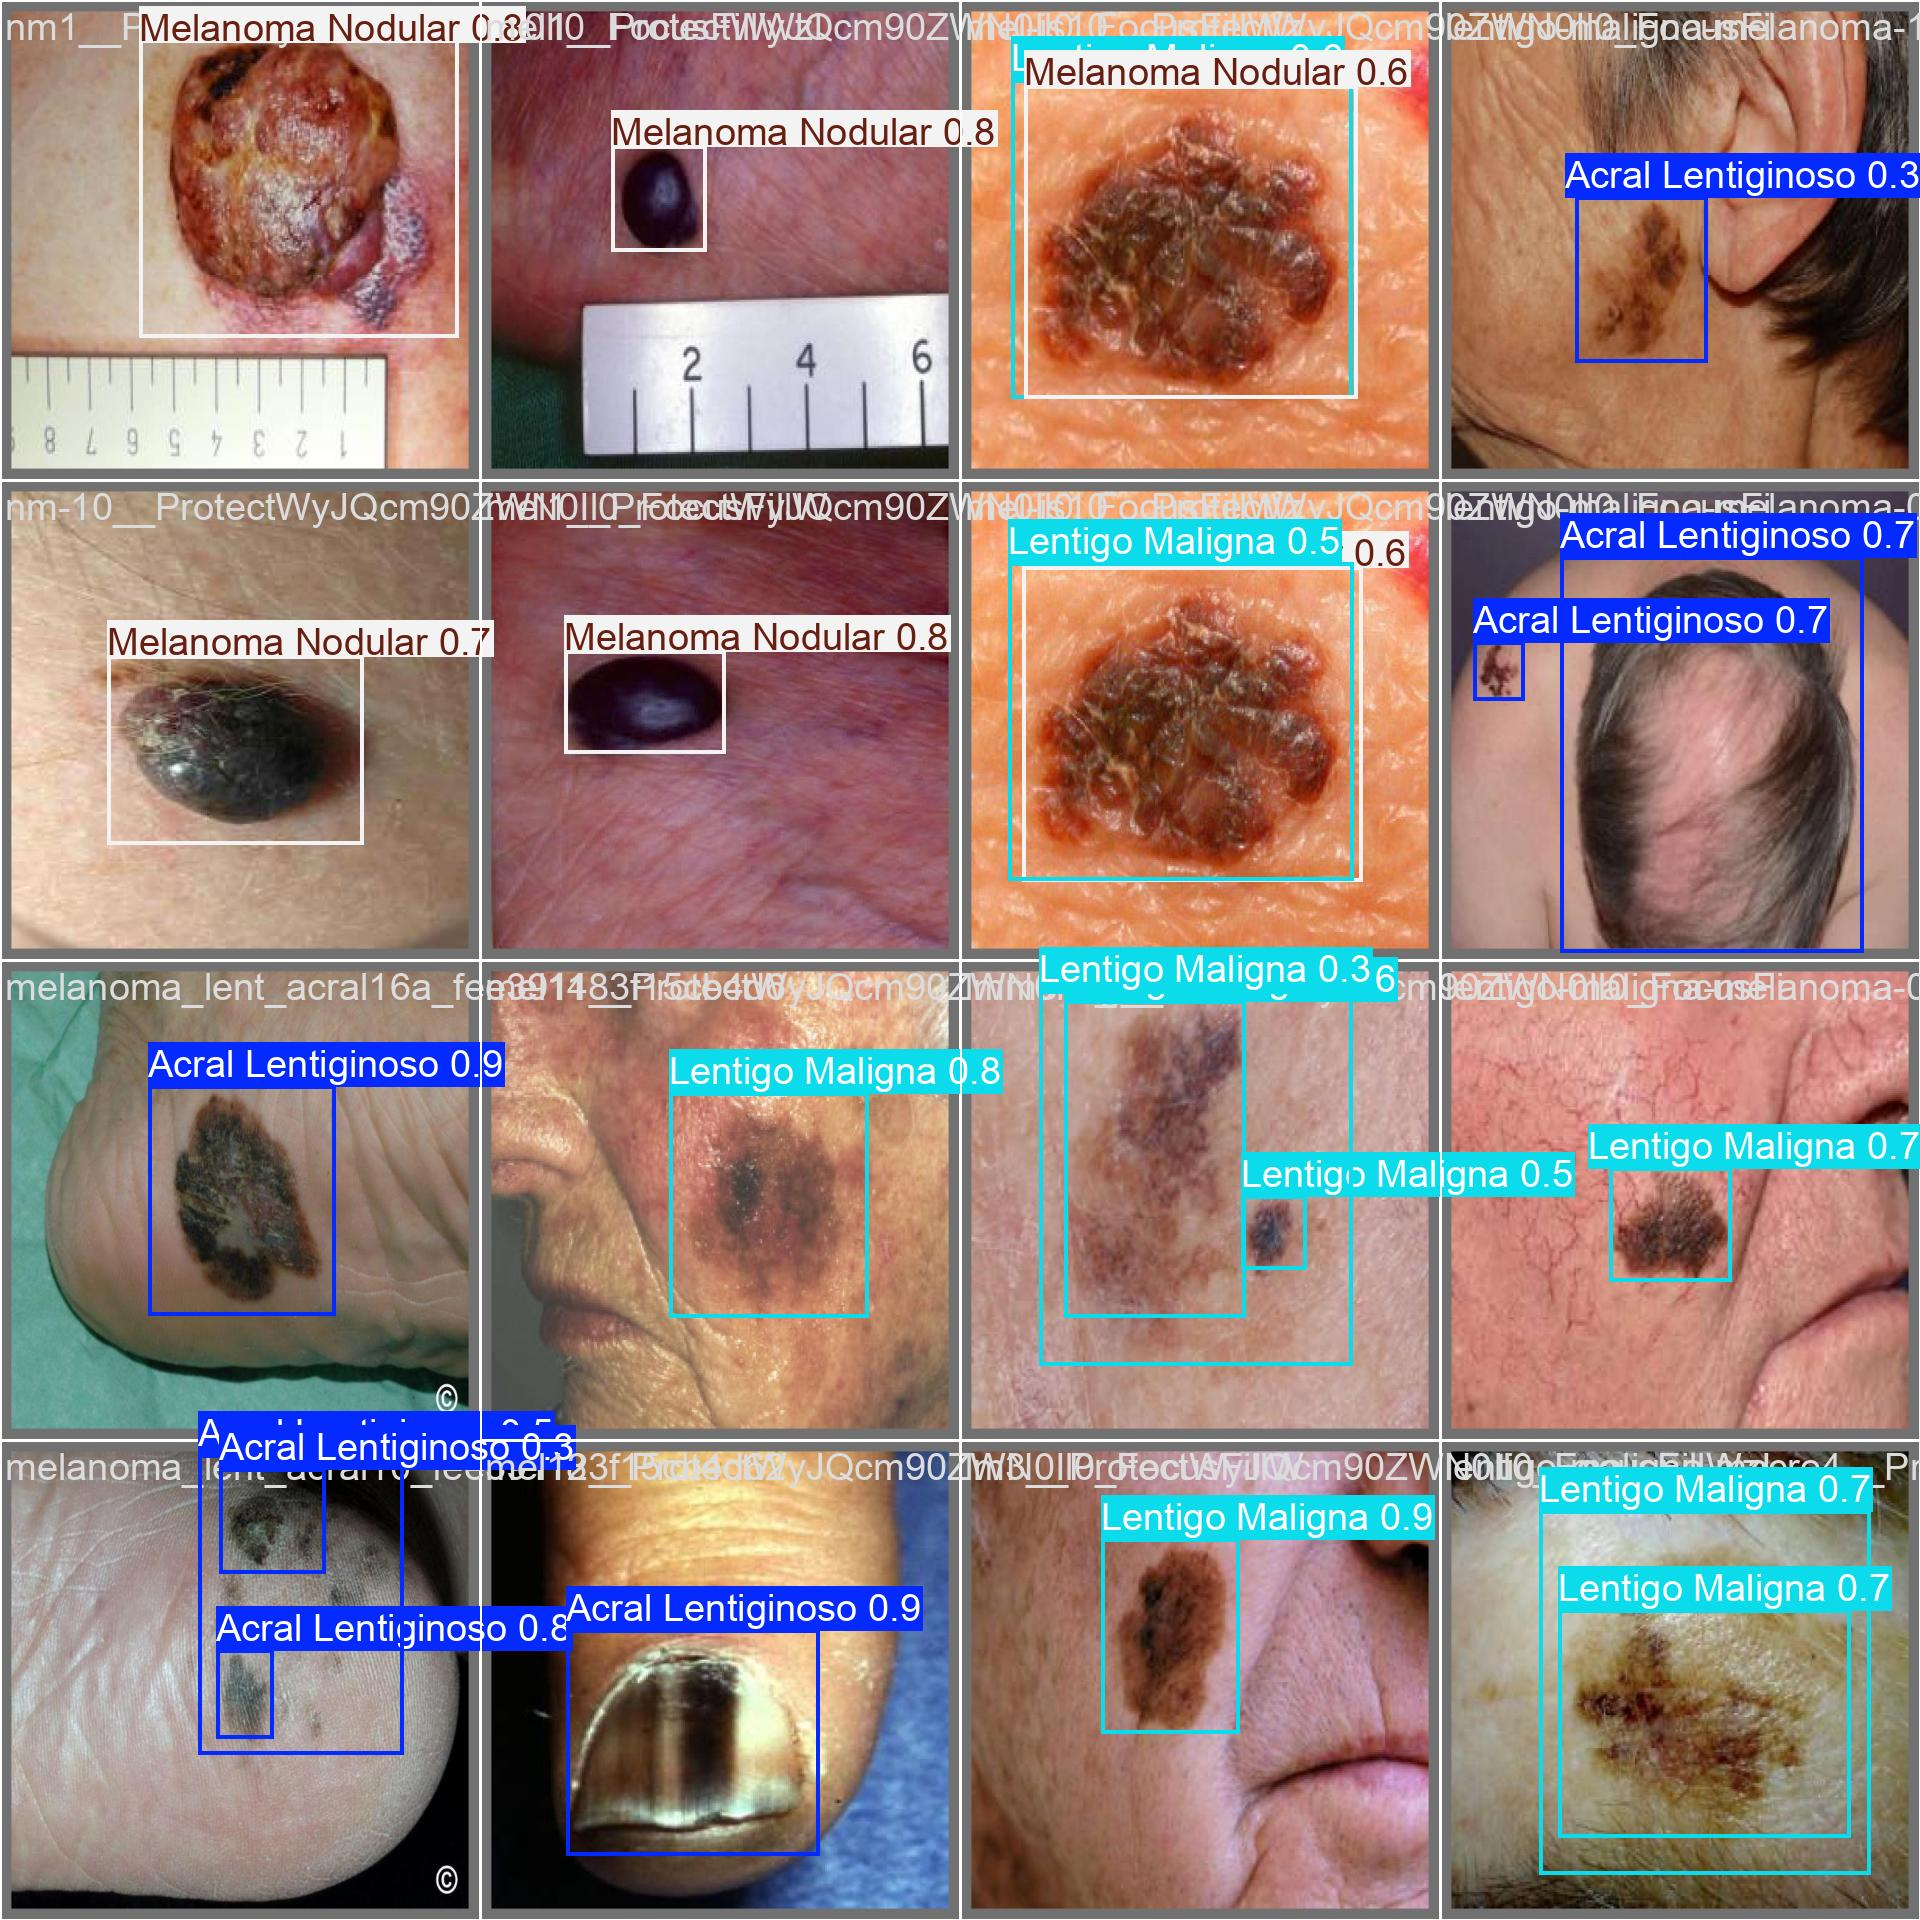

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data='/content/drive/MyDrive/Treinamento_TCC_YAS/Cenário_2/Tipos-de-Melanoma-5/data.yaml' split='test'

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 907, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 506, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'TCC' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=val', 'model=/content/drive/MyDrive/Treinamento', 'TCC', 'YAS/Cenário', '2/runs/detect/train2/weights/best.pt', 'data=/content/drive/MyDrive/Treinamento_TCC_YAS/Cenário_2/Tipos-de-Melanoma-5/data.yaml', 'split=test']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['obb', 'classify', 'pose', 'segment', 'd

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=true

/content/drive/MyDrive/Treinamento TCC YAS/Cenário 2
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 907, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 506, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'TCC' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=predict', 'model=/content/drive/MyDrive/Treinamento', 'TCC', 'YAS/Cenário', '2/runs/detect/train/weights/best.pt', 'conf=0.5', 'source=/content/drive/MyDrive/Treinamento', 'TCC', 'YAS/Cenário', '2/Tipos-de-Melanoma-5/test/images', 'save=true']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['classify', '

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:30]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import pandas as pd
import glob

paths = glob.glob("/content/**/results.csv", recursive=True)
paths